In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graphenetools import gt
import re,glob,os
from scipy.signal import argrelextrema
from scipy.optimize import brentq
import multiprocessing 
import sys,importlib
from dgutils import colors as colortools
from collections import defaultdict
import pickle
from matplotlib.ticker import MaxNLocator
# Notebook display options
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
plt.rcParams.update(plt.rcParamsDefault)
#import layerutils
#importlib.reload(layerutils)
#from layerutils import lab,vals,texformat,get_base_dir
#import dgutils.colors as colortools
from pimcscripts import pimchelp
from collections import defaultdict
from fractions import Fraction
blue_color = (0, 0, 1)          
black_color = (0, 0, 0)       
orange_color = (1, 0.647, 0)    
red_color = (1, 0, 0)           
green_color = (0, .5, 0)        
dark_orange_color = (0.6, 0.2, 0.8)
darker_blue_color = (0, 0, 0.5)
darker_red_color = (0.6, 0.2, 0.8)        


In [2]:
directory_paths = {
    r'$N_g = 0$': '../data/NOdata',
    r'$N_g = 1$': '../data/FIRSTdata',
    r'$N_g = 2$': '../data/SECONDdata',
    r'$N_g = 3$':'../data/THIRDdata',
    r'$N_g = \infty$':'../data/FULLdata'
}
for key, value in directory_paths.items():
    print(f"Key: {key}, Value: {value}")

Key: $N_g = 0$, Value: ../data/NOdata
Key: $N_g = 1$, Value: ../data/FIRSTdata
Key: $N_g = 2$, Value: ../data/SECONDdata
Key: $N_g = 3$, Value: ../data/THIRDdata
Key: $N_g = \infty$, Value: ../data/FULLdata


In [3]:

chemical_dict={}
EN_dict={}
ENError_dict={}
N_dict={}
NError_dict={}
E_dict={}
EError_dict={}
r={}
rho={}
Super ={}
for key, value in directory_paths.items():
    EN = []
    ENError =[]
    u = []
    N = []
    NError = []
    E = []
    EError =[]
    r = []
    rho = []
    wd = directory_paths[key]
    Data = np.loadtxt(f"{wd}/estimator-u-reduce.dat")
    for i in range(0,len(Data)):
        EN.append(Data[i][17])
        ENError.append(Data[i][18])
        u.append(Data[i][0])
        E.append(Data[i][9])
        EError.append(Data[i][10])
        N.append(Data[i][19])
        NError.append(Data[i][20])
    chemical_dict[key] = u
    EN_dict[key] = EN
    ENError_dict[key] = ENError
    N_dict[key] = N
    NError_dict[key] = NError
    E_dict[key] = E
    EError_dict[key] = EError
linear_density = {}
for key, value in directory_paths.items():
    linear_density[key] = pimchelp.PIMCResults(f"{value}/lineardensity-u-reduce.dat")
for key, value in directory_paths.items():
    Super[key] = pimchelp.PIMCResults(f"{value}/super-u-reduce.dat")
                       

In [4]:
# data1 = pd.read_fwf(f"{wd}/lineardensity-u-reduce.dat", skiprows=1)
# #print(data1.head())
# linear_density = {}
# linear_density['first'] = pimchelp.PIMCResults(f"{wd}/lineardensity-u-reduce.dat")
# #print(linear_density)
#print(linear_density['FullShell'].params)
#print(linear_density['FullShell'].headers)
print(Super[r'$N_g = 0$'].params)
print(Super[r'$N_g = 0$'].headers)


[]
('u', 'rho_s/rho', 'Δrho_s/rho', 'W^2(x)', 'ΔW^2(x)', 'W^2(y)', 'ΔW^2(y)', 'W^2(z)', 'ΔW^2(z)', 'P(-10)', 'ΔP(-10)', 'P(-9)', 'ΔP(-9)', 'P(-8)', 'ΔP(-8)', 'P(-7)', 'ΔP(-7)', 'P(-6)', 'ΔP(-6)', 'P(-5)', 'ΔP(-5)', 'P(-4)', 'ΔP(-4)', 'P(-3)', 'ΔP(-3)', 'P(-2)', 'ΔP(-2)', 'P(-1)', 'ΔP(-1)', 'P(+0)', 'ΔP(+0)', 'P(+1)', 'ΔP(+1)', 'P(+2)', 'ΔP(+2)', 'P(+3)', 'ΔP(+3)', 'P(+4)', 'ΔP(+4)', 'P(+5)', 'ΔP(+5)', 'P(+6)', 'ΔP(+6)', 'P(+7)', 'ΔP(+7)', 'P(+8)', 'ΔP(+8)', 'P(+9)', 'ΔP(+9)', 'P(+10)', 'ΔP(+10)', 'Area_rho_s', 'ΔArea_rho_s')


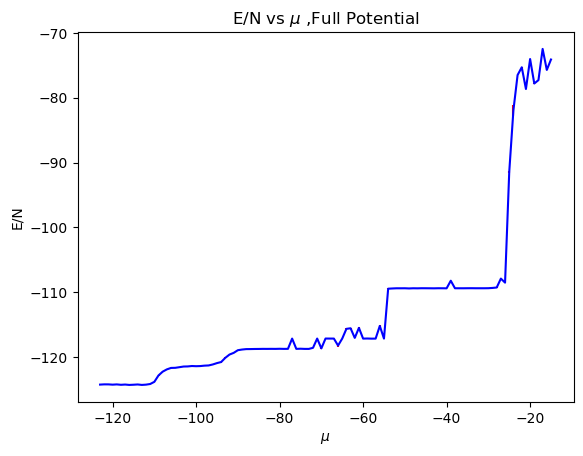

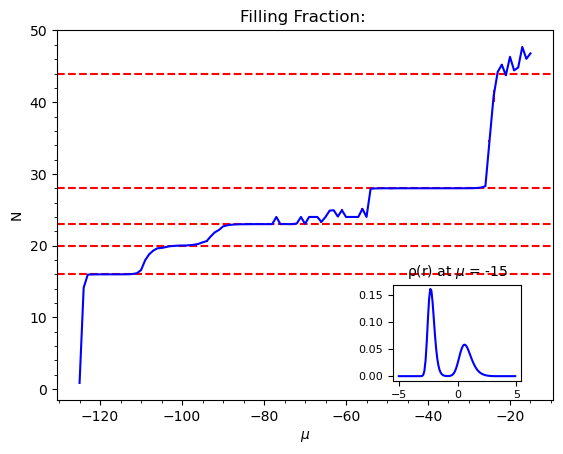

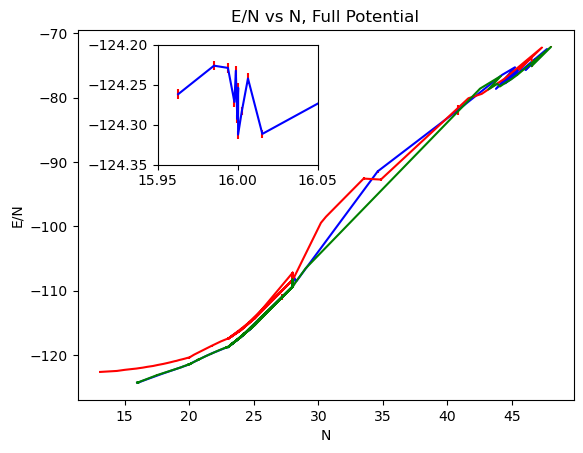

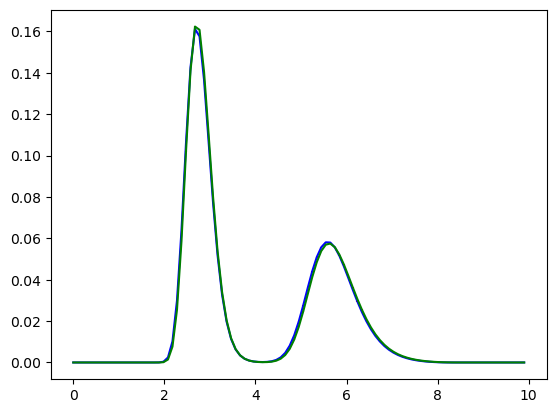

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
import matplotlib.ticker as ticker
plt.errorbar(chemical_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Full Potential')
#plt.xlim(-80,-40)
plt.show()
plt.rcParams.update(plt.rcParamsDefault)
#-----------------------
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],N_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.axhline(y=16, color='red', linestyle='--',label='d')
ax_main.axhline(y=20, color='red', linestyle='--',label='d')
ax_main.axhline(y=23, color='red', linestyle='--',label='d')
ax_main.axhline(y=28, color='red', linestyle='--',label='d')
ax_main.axhline(y=44, color='red', linestyle='--',label='d')

major_tick_spacing_y = 10  # Spacing for major ticks
minor_tick_spacing_y = 2   # Spacing for minor ticks
ax_main.yaxis.set_major_locator(ticker.MultipleLocator(base=major_tick_spacing_y))
ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(base=minor_tick_spacing_y))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(ticker.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(ticker.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel('N')
ax_main.set_title(r'Filling Fraction: ')


# Create the zoomed-in subplot
zoom_left = 0.65  # Specify the left position of the zoomed-in subplot
zoom_bottom = 0.15  # Specify the bottom position of the zoomed-in subplot, adjust this value as needed
zoom_width = 0.2  # Specify the width of the zoomed-in subplot
zoom_height = 0.2  # Specify the height of the zoomed-in subplot
ax_zoom2 = fig.add_axes([zoom_left, zoom_bottom, zoom_width, zoom_height])
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]'], linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -15", fontsize=10)  # Adjust the font size
ax_zoom2.tick_params(axis='both', which='both', labelsize=8) 
plt.show()
#---------------------
'''
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict['FullShell'],[x/48 for x in N_dict['FullShell']], yerr=[x/48 for x in ENError_dict['FullShell']],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.set_ylabel('N')
ax_main.set_title(r'ρ(r) vs. r [Å] ')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(linear_density['FullShell'].data['u = -23.00 -- r [Å]'],linear_density['FullShell'].data['u = -23.00 -- ρ(r)'],yerr=linear_density['FullShell'].data['u = -23.00 -- Δρ(r)'],color='blue',ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -24 ")
#ax_zoom2.set_xlim(27.75,28.25)
#ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()
'''
#-----------------------

fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
ax_main.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='red',ecolor='red')
ax_main.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='green',ecolor='red')

ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Full Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.95,16.05)
ax_inner.set_ylim(-124.35,-124.2)
plt.rcParams['text.usetex'] = True
plt.show()

plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
plt.errorbar(linear_density[r'$N_g = 0$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -15.00 -- Δρ(r)'], color='green', ecolor='red')
plt.show()

#plt.rcParams.update(plt.rcParamsDefault)
#plt.errorbar(Super['FullShell'].data['u'], Super['FullShell'].data['rho_s/rho'], yerr=Super['FullShell'].data['Δrho_s/rho'], color='blue', ecolor='red')
#plt.errorbar(Super['ThirdShell'].data['u'], Super['ThirdShell'].data['rho_s/rho'], yerr=Super['ThirdShell'].data['Δrho_s/rho'], color='green', ecolor='red')
#plt.show()

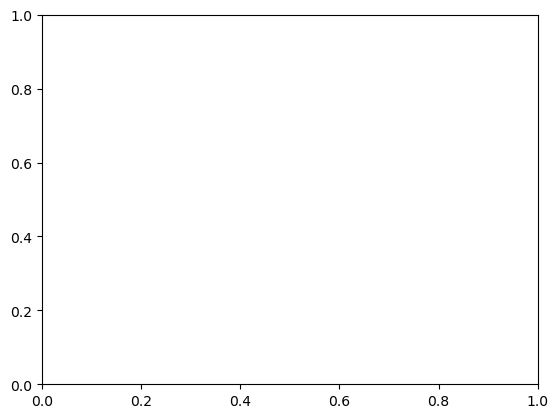

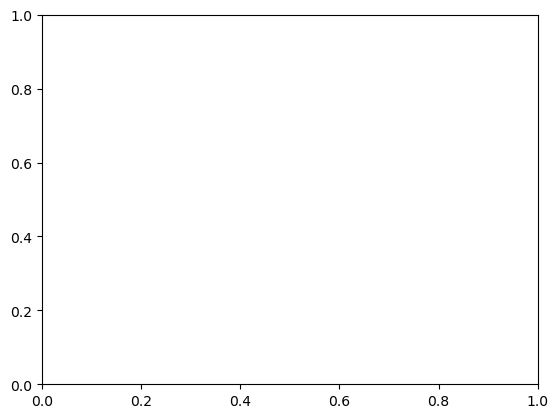

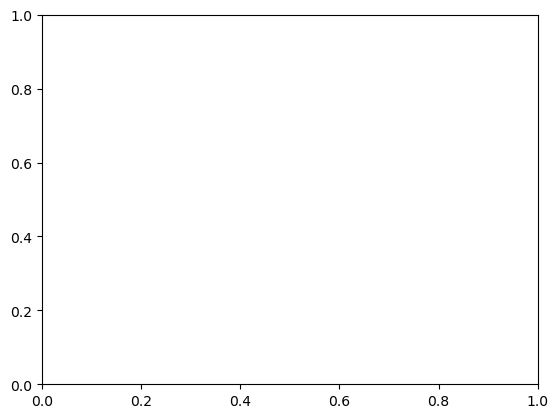

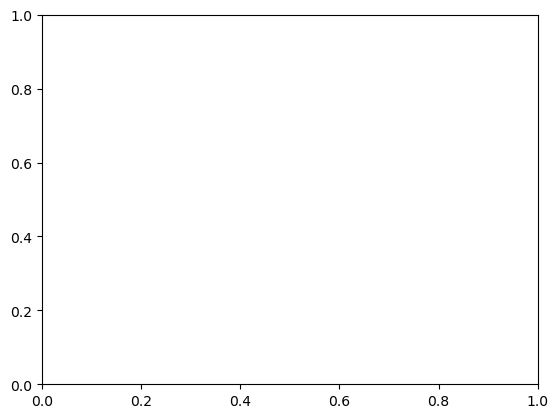

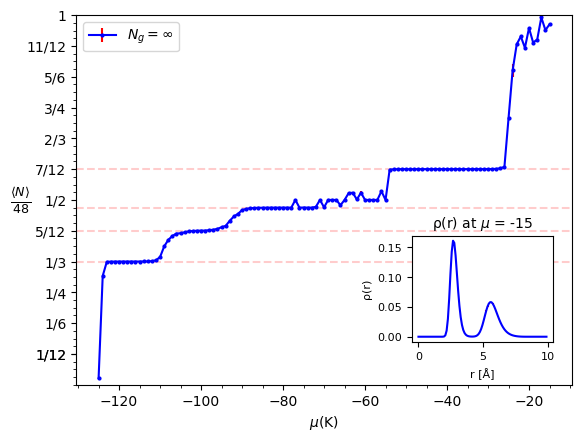

In [32]:
plt.rcParams.update(plt.rcParamsDefault)

fig, ax_main = plt.subplots()
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,
                 yerr=err,color='blue',ecolor='red',marker='o',
                 markersize=2, linestyle='-', label =r'$N_g = \infty$' )
ax_main.set_xlabel(r'$\mu$(K)',fontsize=10)
ax_main.set_ylim(0, 1)
ax_main.axhline(y=16/48, color='red',alpha=.2, linestyle='--')
ax_main.axhline(y=20/48, color='red',alpha=.2, linestyle='--')
ax_main.axhline(y=23/48, color='red',alpha=.2, linestyle='--')
ax_main.axhline(y=28/48, color='red',alpha=.2, linestyle='--')
#ax_main.axhline(y=44, color='red', linestyle='--',label='d')
# Manually specify the major tick positions as fractions of 48
def format_fraction(x, pos):
    frac = Fraction(x).limit_denominator()
    if x ==1:
        return 1
    else:
        return f"{frac.numerator}/{frac.denominator}"

# Set the y-axis limits to match the range [0, 1]
#ax_main.set_ylim(0, 1)

# Manually specify the major tick positions as fractions of 48
major_tick_positions = [1/12,4/48,8/48,12/48,1/3,20/48,24/48,28/48,32/48,36/48,40/48,44/48, 1]
ax_main.set_yticks(major_tick_positions)

# Apply the custom formatter to the y-axis
ax_main.yaxis.set_major_formatter(ticker.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(base=1/48))
# Set the y-axis minor locator to add more minor ticks
#ax_main.yaxis.set_minor_locator(ticker.MultipleLocator(base=1/48))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(ticker.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(ticker.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'$\frac{\langle N \rangle}{48}$',fontsize=13)
ax_main.yaxis.get_label().set_rotation(0)
ax_main.yaxis.get_label().set_verticalalignment('center') 
#ax_main.set_title(r'Filling Fraction: ')

#ax_main.grid(which='both', axis='y', linestyle='--')

# Create the zoomed-in subplot
zoom_left = 0.65  # Specify the left position of the zoomed-in subplot
zoom_bottom = 0.2  # Specify the bottom position of the zoomed-in subplot, adjust this value as needed
zoom_width = 0.22  # Specify the width of the zoomed-in subplot
zoom_height = 0.22 # Specify the height of the zoomed-in subplot
ax_zoom2 = fig.add_axes([zoom_left, zoom_bottom, zoom_width, zoom_height])
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -15", fontsize=10)  # Adjust the font size
ax_zoom2.tick_params(axis='both', which='both', labelsize=8) 
ax_zoom2.set_ylabel(r'ρ(r)',fontsize=8)
ax_zoom2.set_xlabel(r'r [Å]',fontsize=8)
ax_main.legend()
plt.show()

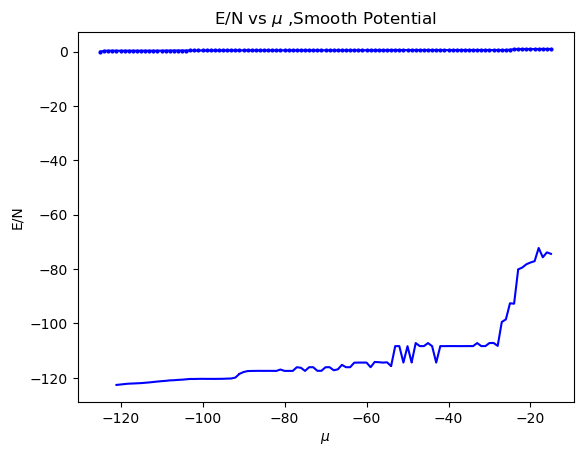

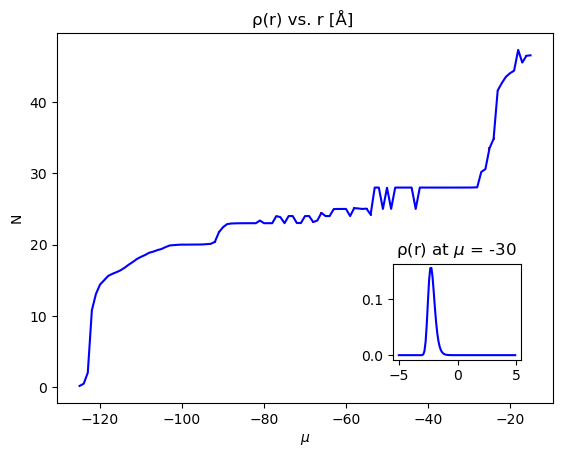

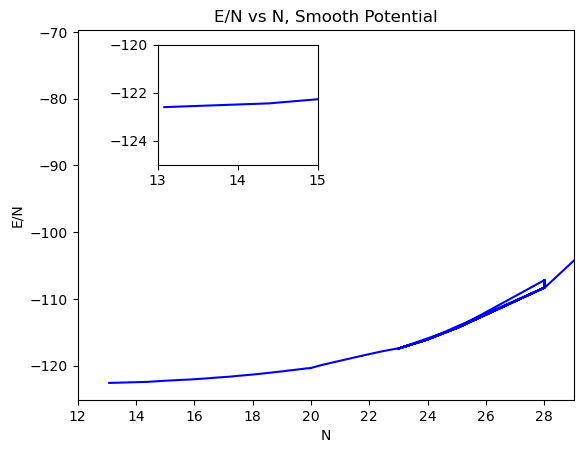

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
#print(u)
#print(EN)
plt.errorbar(chemical_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Smooth Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict[r'$N_g = 0$'],N_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.set_ylabel('N')
ax_main.set_title(r'ρ(r) vs. r [Å] ')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(linear_density[r'$N_g = 0$'].data['u = -30.00 -- r [Å]'],linear_density[r'$N_g = 0$'].data['u = -30.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 0$'].data['u = -30.00 -- Δρ(r)'],color='blue',ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -30 ")
#ax_zoom2.set_xlim(27.75,28.25)
#ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Smooth Potential')
ax_main.set_xlim(12,29)


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_inner.set_xlim(13,15)
ax_inner.set_ylim(-125,-120)
plt.show()

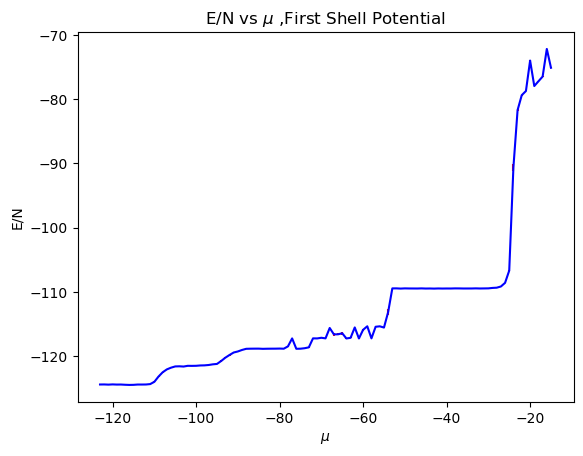

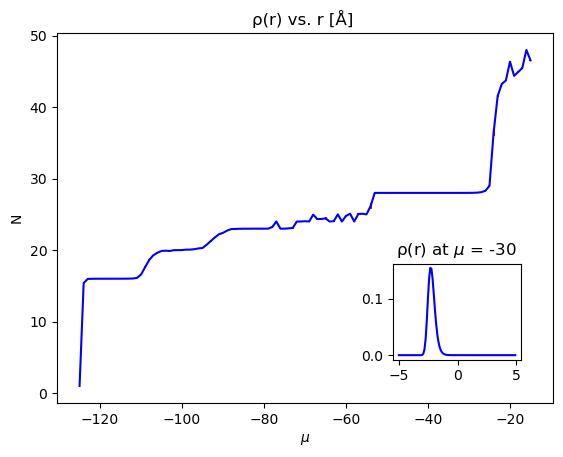

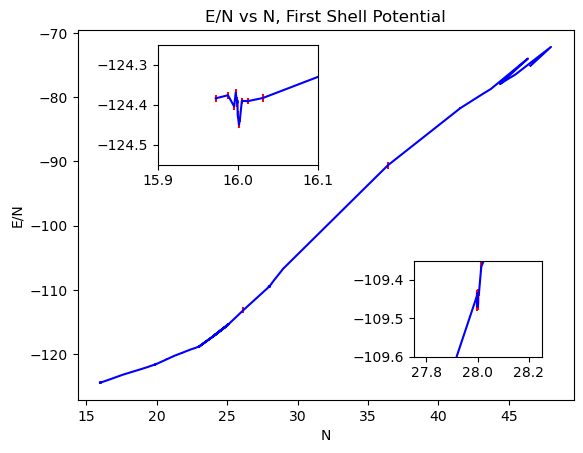

In [8]:
#print(u)
#print(EN)
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(chemical_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,First Shell Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
fig, ax_main = plt.subplots()
ax_main.errorbar(chemical_dict[r'$N_g = 1$'],N_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_main.set_xlabel(r'$\mu$')
ax_main.set_ylabel('N')
ax_main.set_title(r'ρ(r) vs. r [Å] ')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(linear_density[r'$N_g = 1$'].data['u = -30.00 -- r [Å]'],linear_density[r'$N_g = 1$'].data['u = -30.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 1$'].data['u = -30.00 -- Δρ(r)'],color='blue',ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -30 ")
#ax_zoom2.set_xlim(27.75,28.25)
#ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, First Shell Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.9,16.1)
ax_inner.set_ylim(-124.55,-124.25)
ax_zoom2 = fig.add_axes([0.65, 0.2, 0.2, 0.2])
ax_zoom2.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='blue',ecolor='red')
ax_zoom2.set_xlim(27.75,28.25)
ax_zoom2.set_ylim(-109.6,-109.35)
plt.show()

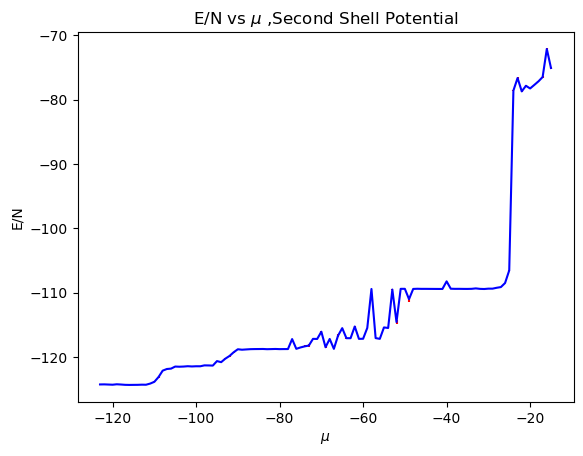

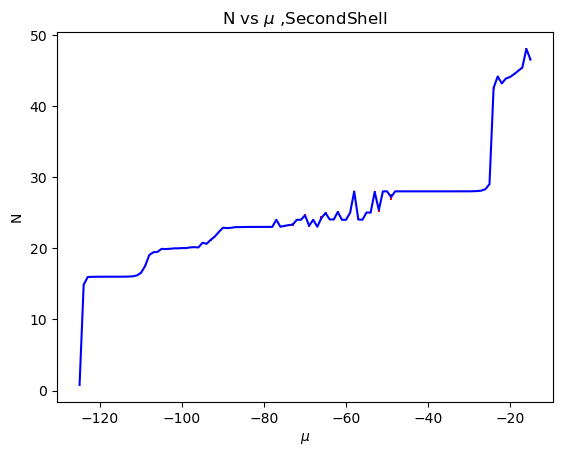

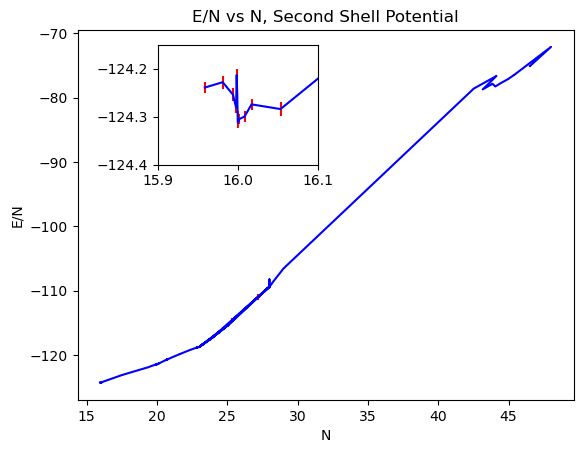

In [9]:
#print(u)
#print(EN)
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(chemical_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Second Shell Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
plt.errorbar(chemical_dict[r'$N_g = 2$'],N_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('N')
plt.title(r'N vs $\mu$ ,SecondShell')
#plt.xlim(-80,-40)
plt.show()
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Second Shell Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.9,16.1)
ax_inner.set_ylim(-124.4,-124.15)
plt.show()

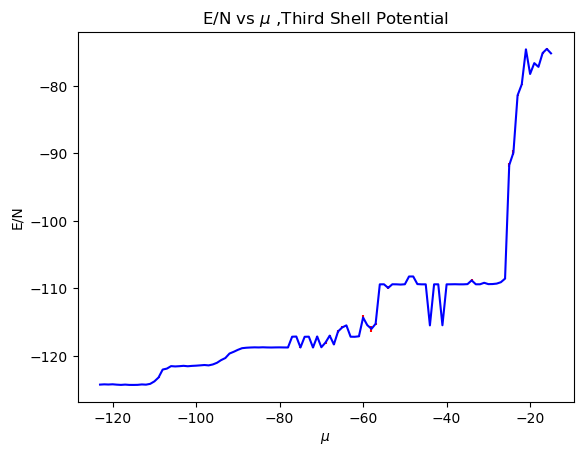

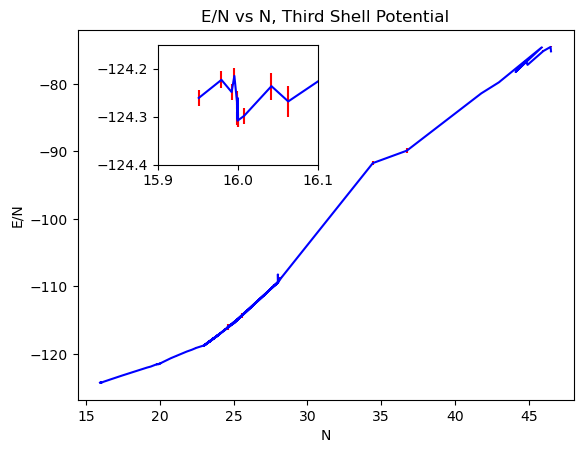

In [10]:
#print(u)
#print(EN)
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(chemical_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='blue',ecolor='red')
plt.xlabel(r'$\mu$')
plt.ylabel('E/N')
plt.title(r'E/N vs $\mu$ ,Third Shell Potential')
#plt.xlim(-80,-40)
plt.show()
#print(u)
#print(EN)
fig, ax_main = plt.subplots()
ax_main.errorbar(N_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='blue',ecolor='red')
ax_main.set_xlabel("N")
ax_main.set_ylabel('E/N')
ax_main.set_title('E/N vs N, Third Shell Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 0.6  # Specify the bottom position of the inner subplot
inner_width = 0.25  # Specify the width of the inner subplot
inner_height = 0.25  # Specify the height of the inner subplot
ax_inner = fig.add_axes([inner_left, inner_bottom, inner_width, inner_height])
ax_inner.errorbar(N_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='blue',ecolor='red')
ax_inner.set_xlim(15.9,16.1)
ax_inner.set_ylim(-124.4,-124.15)
plt.show()

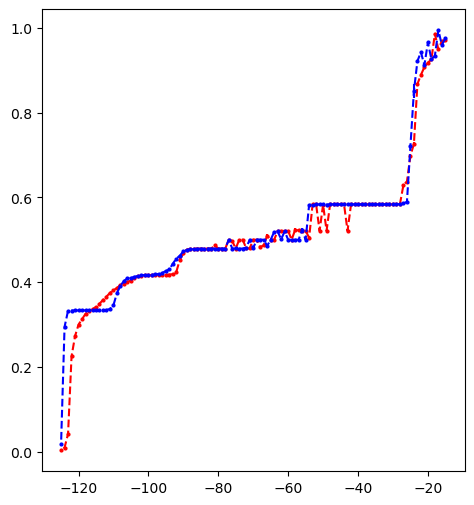

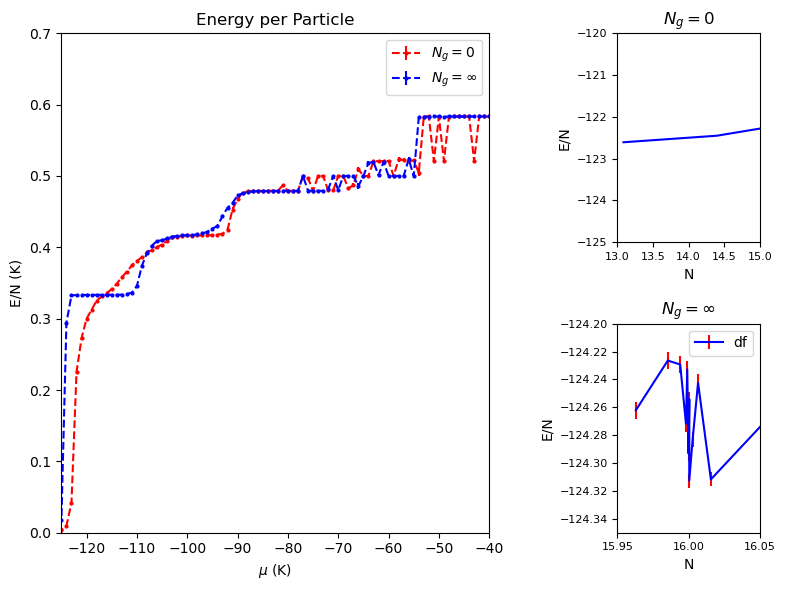

In [35]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the figure and gridspec
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 1])  # Updated width_ratios

# Generate the main plot data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create the main plot
ax_main = plt.subplot(gs[:, 0])  # Change the column index to 0
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 0$'])/48)

ax_main.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,
                 yerr=err,color='red',marker='o', markersize=2, linestyle='--',label=r'$N_g = 0$')
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,
                 yerr=err,color='blue',marker='o', markersize=2, 
                 linestyle='--',label=r'$N_g = \infty$')
ax_main.set_xlabel(r'$\mu$ (K)',fontsize=10)
ax_main.set_ylabel('E/N (K)',fontsize=10)
ax_main.set_title('Energy per Particle')
ax_main.set_xlim(-125,-40)
ax_main.set_ylim(0,.7)
ax_main.legend()
# Create the plot in the top right corner
ax_corner = plt.subplot(gs[0, 1])  # Change the column index to 1
ax_corner.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='red')
ax_corner.set_xlabel('N')
ax_corner.set_ylabel('E/N')
ax_corner.set_title(r'$N_g = 0$')
ax_corner.set_xlim(13,15)
ax_corner.set_ylim(-125,-120)
# Create the zoomed-in plot
ax_zoom = plt.subplot(gs[1, 1])  # Change the column index to 1 and the row index to 1
ax_zoom.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='blue',ecolor='red',label='df')
ax_zoom.set_xlim(15.95,16.05)  # Set the x-axis limits for zooming
ax_zoom.set_ylim(-124.35,-124.2)  # Set the y-axis limits for zooming
ax_zoom.set_xlabel('N')
ax_zoom.set_ylabel('E/N')
ax_zoom.set_title(r'$N_g = \infty$')
ax_zoom.legend()
# Adjust the spacing between the subplots
plt.tight_layout()
ax_corner.tick_params(axis='both', which='both', labelsize=8)
ax_zoom.tick_params(axis='both', which='both', labelsize=8)
# Display the figure
plt.show()

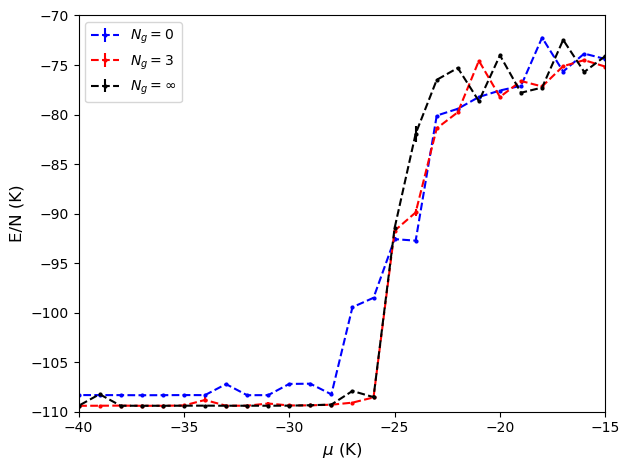

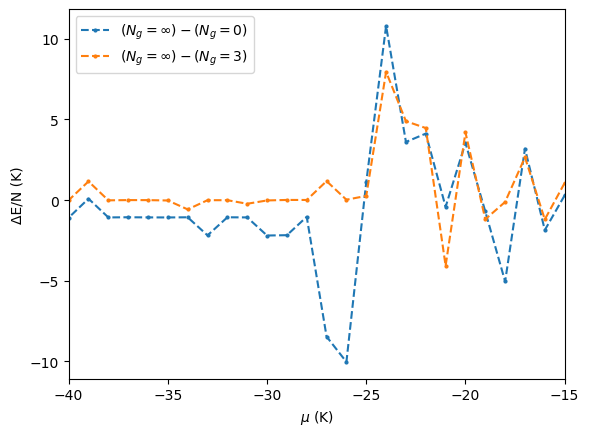

In [36]:
colors_dict = {r'$N_g = 0$':'blue',r'$N_g = 1$':'orange',r'$N_g = 2$':'green',r'$N_g = 3$':'red',r'$N_g = \infty$':'black'}
for key, value in directory_paths.items():
    #print(u)
    #print(EN)
    if key ==r'$N_g = 1$' or key ==r'$N_g = 2$':#key ==r'$N_g = 1$' or key ==r'$N_g = 2$' or key == r'$N_g = 3$'
        pass
    else:
        plt.rcParams.update(plt.rcParamsDefault)
        plt.errorbar(chemical_dict[key],EN_dict[key],yerr=ENError_dict[key],label=key,marker='o',linestyle='--', markersize=2,color=colors_dict[key])
        #plt.axhline(y=-75, color='red',alpha=.2, linestyle='--')
        plt.xlabel(r'$\mu$ (K)',fontsize=12)
        plt.ylabel('E/N (K)',fontsize=12)
        #plt.ylabel.set_rotation(0)
        #plt.title(r'E/N vs $\mu$ ,All Potential')
    plt.xlim(-40,-15)
    plt.ylim(-110,-70)
    #print(u)
    #print(EN)
plt.legend()
plt.tight_layout()
#plt.savefig('Images/AllButNo_EN_1.pdf', format='pdf')
plt.show()
#----------------------
#----------------------
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(np.array(chemical_dict[r'$N_g = \infty$'])[:111],np.array(EN_dict[r'$N_g = \infty$'])[:111]-np.array(EN_dict[r'$N_g = 0$']),label=r'$(N_g = \infty) - (N_g = 0)$',marker='o',linestyle='--', markersize=2)
plt.errorbar(np.array(chemical_dict[r'$N_g = \infty$'])[:111],np.array(EN_dict[r'$N_g = \infty$'])[:111]-np.array(EN_dict[r'$N_g = 3$']),label=r'$(N_g = \infty) - (N_g = 3)$',marker='o',linestyle='--', markersize=2)
plt.xlabel(r'$\mu$ (K)',fontsize=10)
plt.ylabel('ΔE/N (K)',fontsize=10)
plt.xlim(-40,-15)
#plt.xlim(-40,-15)
#plt.ylim(-110,-70)
    #print(u)
    #print(EN)
plt.legend()
plt.show()



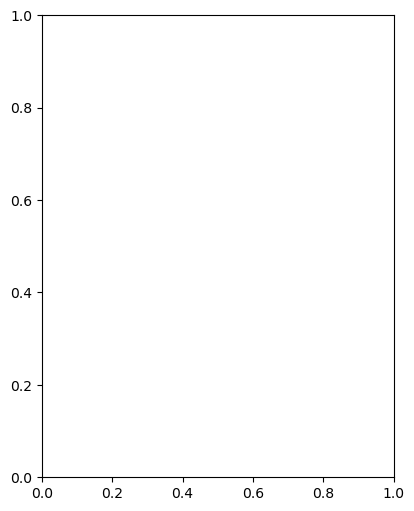

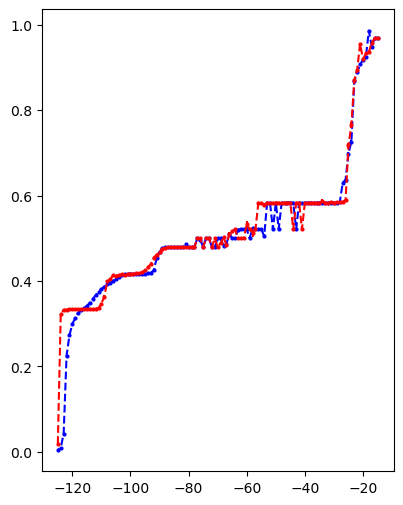

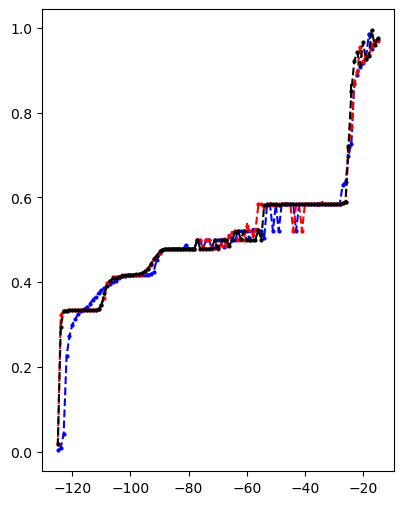

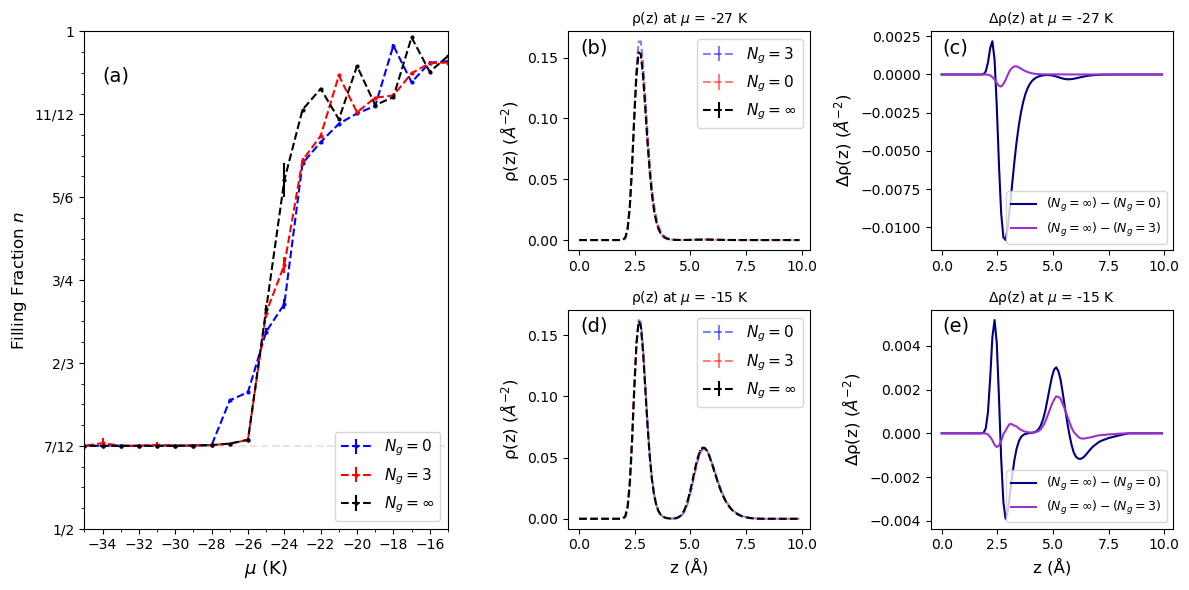

In [40]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from fractions import Fraction
plt.rcParams.update(plt.rcParamsDefault)
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[3, 2, 2], height_ratios=[1, 1])
# Rest of your code ...

# Create the main plot
ax_main = plt.subplot(gs[:, 0])
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 0$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,
                 yerr=err,color=blue_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 0$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 3$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 3$'],np.array(N_dict[r'$N_g = 3$'])/48,yerr=err,
                 color=red_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 3$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,yerr=err,
                 color=black_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = \infty$')
ax_main.set_xlabel(r'$\mu$ (K)',fontsize=13)
ax_main.set_xlim(-35, -15)
ax_main.set_ylim(1/2,1)
ax_main.axhline(y=16/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=20/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=23/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=28/48, color='grey',alpha=.2, linestyle='--')

# Manually specify the major tick positions as fractions of 48
def format_fraction(x, pos):
    frac = Fraction(x).limit_denominator()
    if x == 1:
        return '1'
    else:
        return f"{frac.numerator}/{frac.denominator}"

major_tick_positions = [24/48, 28/48, 32/48, 36/48, 40/48, 44/48, 1]
ax_main.set_yticks(major_tick_positions)
ax_main.yaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
major_tick_spacing_x = 2  # Spacing for major ticks
minor_tick_spacing_x = 1   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(plt.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'Filling Fraction $n$', fontsize=12)
#ax_main.legend(loc='upper left')

# Create the first subplot on the top right
ax_corner1 = plt.subplot(gs[1, 1])  # Change the column index to 1
ax_corner1.errorbar(linear_density[r'$N_g = 0$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -15.00 -- Δρ(r)'], color=blue_color,linestyle='--',alpha=.5,label=r'$N_g = 0$')
ax_corner1.errorbar(linear_density[r'$N_g = 3$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 3$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 3$'].data['u = -15.00 -- Δρ(r)'], color=red_color,linestyle='--',alpha=.5,label=r'$N_g = 3$')
ax_corner1.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'],linestyle='--', color=black_color,label=r'$N_g = \infty$')
ax_corner1.set_ylabel(r'ρ(z) $(Å^{-2})$',fontsize=12)
ax_corner1.set_xlabel(r'z (Å)',fontsize=12)

ax_corner1.tick_params(axis='both', which='both', labelsize=10)
ax_corner1.set_title(r"ρ(z) at $\mu$ = -15 K", fontsize=10)

# Create the second subplot on the middle right
ax_zoom1 = plt.subplot(gs[0, 1])  # Change the column index to 1 and the row index to 1
ax_zoom1.errorbar(linear_density[r'$N_g = 0$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -27.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -27.00 -- Δρ(r)'], color=blue_color,linestyle='--',alpha=.5,label=r'$N_g = 3$')
ax_zoom1.errorbar(linear_density[r'$N_g = 3$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = 3$'].data['u = -27.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 3$'].data['u = -27.00 -- Δρ(r)'], color=red_color,linestyle='--',alpha=.5,label=r'$N_g = 0$')
ax_zoom1.errorbar(linear_density[r'$N_g = \infty$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -27.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -27.00 -- Δρ(r)'],linestyle='--', color=black_color,label=r'$N_g = \infty$')
ax_zoom1.set_ylabel(r'ρ(z) $(Å^{-2})$',fontsize=12)
ax_zoom1.tick_params(axis='both', which='both', labelsize=10)
ax_zoom1.set_title(r"ρ(z) at $\mu$ = -27 K", fontsize=10)

# Create the third subplot on the bottom right
ax_corner2 = plt.subplot(gs[1, 2])  # Change the column index to 1
ax_corner2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)']-linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'],linestyle='-', color=darker_blue_color,label =r'$(N_g = \infty) - (N_g = 0)$')
#ax_corner.errorbar(linear_density[r'$N_g = 0$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -15.00 -- Δρ(r)'], color='red',alpha=.5)
#ax_corner.errorbar(linear_density[r'$N_g = 3$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 3$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 3$'].data['u = -15.00 -- Δρ(r)'], color='violet',alpha=.5)
ax_corner2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)']-linear_density[r'$N_g = 3$'].data['u = -15.00 -- ρ(r)'],linestyle='-', color=dark_orange_color,label =r'$(N_g = \infty) - (N_g = 3)$')
#ax_corner.set_xlabel(r'r [Å]',fontsize=8)
ax_corner2.set_xlabel(r'z (Å)',fontsize=12)
ax_corner2.set_ylabel(r'$\Delta$ρ(z) $(Å^{-2})$',fontsize=12)
ax_corner2.tick_params(axis='both', which='both', labelsize=10)
ax_corner2.set_title(r"$\Delta$ρ(z) at $\mu$ = -15 K", fontsize=10)

# Create the fourth subplot on the bottom right
ax_zoom2 = plt.subplot(gs[0, 2])  # Change the column index to 1 and the row index to 1
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -27.00 -- ρ(r)']-linear_density[r'$N_g = 0$'].data['u = -27.00 -- ρ(r)'], color=darker_blue_color,label =r'$(N_g = \infty) - (N_g = 0)$')
#ax_corner.errorbar(linear_density[r'$N_g = 0$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 0$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 0$'].data['u = -15.00 -- Δρ(r)'], color='red',alpha=.5)
#ax_corner.errorbar(linear_density[r'$N_g = 3$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = 3$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = 3$'].data['u = -15.00 -- Δρ(r)'], color='violet',alpha=.5)
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -27.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -27.00 -- ρ(r)']-linear_density[r'$N_g = 3$'].data['u = -27.00 -- ρ(r)'], color=dark_orange_color,label =r'$(N_g = \infty) - (N_g = 3)$')
ax_zoom2.set_ylabel(r'$\Delta$ρ(z) $(Å^{-2}$)',fontsize=12)
ax_zoom2.tick_params(axis='both', which='both', labelsize=10)
ax_zoom2.set_title(r"$\Delta$ρ(z) at $\mu$ = -27 K", fontsize=10)

# Adjust the spacing between the subplots


# Remove overlapping axes warning
#ax_corner.remove()
# handles, labels = [], []
# for ax in [ax_main, ax_zoom2]:
#     h, l = ax.get_legend_handles_labels()
#     handles.extend(h)
#     labels.extend(l)

# Add the legend to the main plot
ax_main.legend(loc='lower right',prop={'size': 11})
ax_corner1.legend(loc='upper right',prop={'size': 11})
ax_corner2.legend(loc='lower right',prop={'size': 9})
ax_zoom1.legend(loc='upper right',prop={'size': 11})
ax_zoom2.legend(loc='lower right',prop={'size': 9})
panel_labels = ['(a)', '(d)', '(b)', '(e)', '(c)']
i=0
for ax in [ax_main,ax_corner1,ax_zoom1,ax_corner2, ax_zoom2]:  # Iterate over the GridSpec object gs
    ax.text(0.05, 0.9, panel_labels[i], transform=ax.transAxes, fontsize=14)
    i+=1
plt.tight_layout()
# Display the figure
plt.savefig('../figures/Fig6.pdf', format='pdf')
plt.savefig('../figures/Fig6.svg', format='svg')

plt.show()

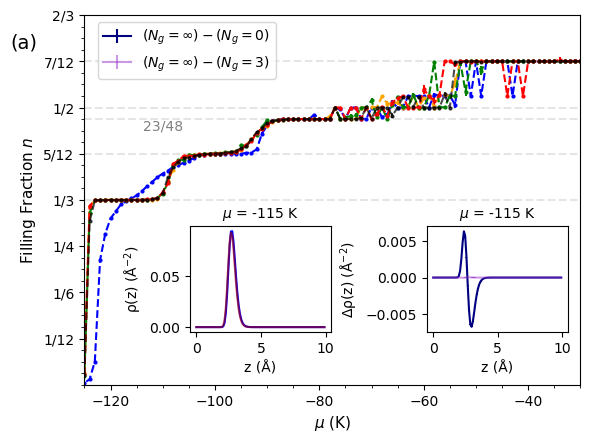

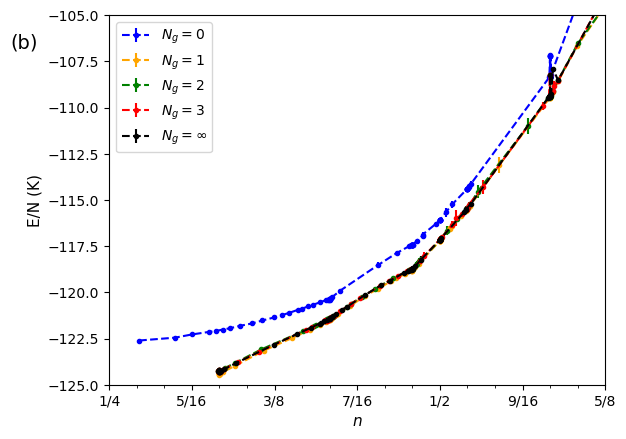

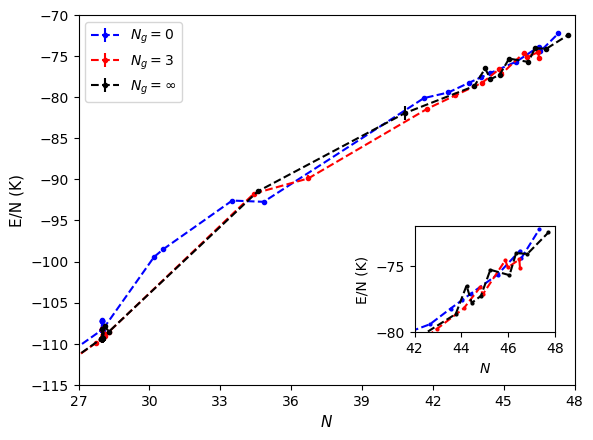

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from fractions import Fraction
plt.rcParams.update(plt.rcParamsDefault)

# Rest of your code ...

# Create the main plot
fig, ax_main = plt.subplots()
err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 0$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 0$'],np.array(N_dict[r'$N_g = 0$'])/48,yerr=err,
                 color=blue_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 0$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 1$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 1$'],np.array(N_dict[r'$N_g = 1$'])/48,yerr=err,
                 color=orange_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 1$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 2$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 2$'],np.array(N_dict[r'$N_g = 2$'])/48,yerr=err,
                 color=green_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 2$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = 3$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = 3$'],np.array(N_dict[r'$N_g = 3$'])/48,yerr=err,
                 color=red_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 3$')

err = np.nan_to_num(np.array(ENError_dict[r'$N_g = \infty$'])/48)
ax_main.errorbar(chemical_dict[r'$N_g = \infty$'],np.array(N_dict[r'$N_g = \infty$'])/48,yerr=err,
                 color=black_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = \infty$',alpha = .7)

ax_main.set_xlabel(r'$\mu$ (K)',fontsize=11)
ax_main.set_xlim(-125, -30)
ax_main.set_ylim(0,2/3)
ax_main.axhline(y=24/48, color='grey',alpha=.2, linestyle='--')
ax_main.text(-110, 22/48, '23/48', color='grey', fontsize=10, ha='center')
ax_main.axhline(y=16/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=20/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=23/48, color='grey',alpha=.2, linestyle='--')
ax_main.axhline(y=28/48, color='grey',alpha=.2, linestyle='--')
# Manually specify the major tick positions as fractions of 48
def format_fraction(x, pos):
    frac = Fraction(x).limit_denominator()
    if x == 1:
        return '1'
    else:
        return f"{frac.numerator}/{frac.denominator}"

major_tick_positions = [1/12,1/6,1/4,1/3,5/12,24/48, 28/48, 32/48]
ax_main.set_yticks(major_tick_positions)
ax_main.yaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.yaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
major_tick_spacing_x = 20  # Spacing for major ticks
minor_tick_spacing_x = 5   # Spacing for minor ticks
ax_main.xaxis.set_major_locator(plt.MultipleLocator(base=major_tick_spacing_x))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=minor_tick_spacing_x))
ax_main.set_ylabel(r'Filling Fraction $n$', fontsize=11)
#ax_main.yaxis.get_label().set_rotation(0)
#ax_main.yaxis.get_label().set_verticalalignment('center')
#ax_main.legend(loc='upper left')

# Create the first subplot on the top right

inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 1  # Specify the bottom position of the inner subplot
inner_width = 0.3  # Specify the width of the inner subplot
inner_height = 0.3  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.66, 0.22, 0.22, 0.22])
ax_zoom2.errorbar(linear_density[r'$N_g = 0$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)']-linear_density[r'$N_g = 0$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']+linear_density[r'$N_g = 0$'].data['u = -115.00 -- Δρ(r)'],color=darker_blue_color,label =r'$(N_g = \infty) - (N_g = 0)$')
#ax_zoom2.errorbar(linear_density[r'$N_g = 1$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)']-linear_density[r'$N_g = 1$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']+linear_density[r'$N_g = 1$'].data['u = -115.00 -- Δρ(r)'],color=orange_color,alpha=.5)
#ax_zoom2.errorbar(linear_density[r'$N_g = 2$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)']-linear_density[r'$N_g = 2$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']+linear_density[r'$N_g = 2$'].data['u = -115.00 -- Δρ(r)'],color=green_color,alpha=.5)
ax_zoom2.errorbar(linear_density[r'$N_g = 3$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)']-linear_density[r'$N_g = 3$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']+linear_density[r'$N_g = 3$'].data['u = -115.00 -- Δρ(r)'],color=darker_red_color,alpha=.5,label =r'$(N_g = \infty) - (N_g = 3)$')
#ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -80.00 -- Δρ(r)']+linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)'],color='black',alpha=.5)
#ax_zoom2.legend()
#ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -80.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -80.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -80.00 -- Δρ(r)'],color='red',alpha=.5)
ax_zoom2.set_title(r"$\mu$ = -115 K ",fontsize=10)
ax_zoom2.set_xlabel(r'z (Å)', fontsize=10)  # Add x label
ax_zoom2.set_ylabel(r'$\Delta$ρ(z) (Å${}^{-2}$)', fontsize=10)
#ax_main.text(-.2, .95, "(a)", transform=ax_main.transAxes,fontsize=14, va='top', ha='left')
#ax_main.legend(loc='upper left',prop={'size': 10})
#plt.tight_layout()
# Display the figure

ax_zoom1 = fig.add_axes([0.29, 0.22, 0.22, 0.22])
ax_zoom1.errorbar(linear_density[r'$N_g = 0$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = 0$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 0$'].data['u = -115.00 -- Δρ(r)'],color=blue_color)
#ax_zoom1.errorbar(linear_density[r'$N_g = 1$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = 1$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 1$'].data['u = -115.00 -- Δρ(r)'],color=orange_color,alpha=.5)
#ax_zoom1.errorbar(linear_density[r'$N_g = 2$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = 2$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 2$'].data['u = -115.00 -- Δρ(r)'],color='green',alpha=.5)
ax_zoom1.errorbar(linear_density[r'$N_g = 3$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = 3$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = 3$'].data['u = -115.00 -- Δρ(r)'],color=red_color,alpha=.5)
ax_zoom1.errorbar(linear_density[r'$N_g = \infty$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -80.00 -- Δρ(r)']+linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)'],color=black_color,alpha=.2)

ax_zoom1.set_title(r"$\mu$ = -115 K ",fontsize=10)
ax_zoom1.set_xlabel(r'z (Å)', fontsize=10)  # Add x label
ax_zoom1.set_ylabel(r'ρ(z) (Å${}^{-2}$)', fontsize=10)
ax_main.legend().set_visible(False)

legend_inset = ax_main.legend(*ax_zoom2.get_legend_handles_labels(), loc='upper right', bbox_to_anchor=(.4, 1), fontsize=10)
 # Add back the main plot legend

ax_main.text(-0.15, 0.95, "(a)", transform=ax_main.transAxes, fontsize=14, va='top', ha='left')
#ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -115.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)']
plt.savefig('../figures/Fig3.pdf', format='pdf')
plt.savefig('../figures/Fig3.svg', format='svg')
plt.show()
#-------------------------------------------------------------------
sorted_indices = {}
sorted_N = {}
sorted_EN = {}
sorted_ENError={}
for key, label in directory_paths.items():
    sorted_indices[key] = np.argsort(N_dict[key])
    sorted_N[key] = [N_dict[key][i] for i in sorted_indices[key]]
    sorted_EN[key] = [EN_dict[key][i] for i in sorted_indices[key]]
    sorted_ENError[key] = [ENError_dict[key][i] for i in sorted_indices[key]]
plt.rcParams.update(plt.rcParamsDefault)
fig, ax_main = plt.subplots()
#plt.errorbar(N_dict[r'$N_g = 0$'],EN_dict[r'$N_g = 0$'],yerr=ENError_dict[r'$N_g = 0$'],color='blue',ecolor='blue',marker='o', markersize=5, linestyle='None',label=r'$N_g = 0$')
#plt.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='orange',ecolor='orange',marker='o', markersize=5, linestyle='None',label=r'$N_g = 1$')
#plt.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='green',ecolor='green',marker='o', markersize=5, linestyle='None',label=r'$N_g = 2$')
#plt.errorbar(N_dict[r'$N_g = 3$'],EN_dict[r'$N_g = 3$'],yerr=ENError_dict[r'$N_g = 3$'],color='red',ecolor='red',marker='o', markersize=5, linestyle='None',label=r'$N_g = 3$')
#plt.errorbar(N_dict[r'$N_g = \infty$'],EN_dict[r'$N_g = \infty$'],yerr=ENError_dict[r'$N_g = \infty$'],color='black',ecolor='black',marker='o', markersize=5, linestyle='None',label=r'$N_g = \infty$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 0$'])/48,sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=blue_color,ecolor=blue_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = 0$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 1$'])/48,sorted_EN[r'$N_g = 1$'],yerr=sorted_ENError[r'$N_g = 1$'],color=orange_color,ecolor=orange_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = 1$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 2$'])/48,sorted_EN[r'$N_g = 2$'],yerr=sorted_ENError[r'$N_g = 2$'],color=green_color,ecolor=green_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = 2$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = 3$'])/48,sorted_EN[r'$N_g = 3$'],yerr=sorted_ENError[r'$N_g = 3$'],color=red_color,ecolor=red_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = 3$')
ax_main.errorbar(np.array(sorted_N[r'$N_g = \infty$'])/48,sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,ecolor=black_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = \infty$')
major_tick_positions2 = [1/4,5/16,3/8,7/16,1/2, 9/16, 5/8]
ax_main.set_xticks(major_tick_positions2)
ax_main.xaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
ax_main.set_xlim(12/48,30/48)
ax_main.set_ylim(-125,-105)
ax_main.set_xlabel(r'$n$',fontsize=11)
ax_main.set_ylabel(r'E/N (K)',fontsize=11)
#plt.title('E/N vs N, Full Potential')
ax_main.text(-.2, .95, "(b)", transform=ax_main.transAxes,
         fontsize=14, va='top', ha='left')
ax_main.legend(fontsize=10)
plt.savefig('../figures/Fig4.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../figures/Fig4.svg', format='svg', bbox_inches='tight')

plt.show()

#--------------------------------------------------------------------
plt.rcParams.update(plt.rcParamsDefault)
fig, ax_main = plt.subplots()
ax_main.errorbar(sorted_N[r'$N_g = 0$'],sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=blue_color,ecolor=blue_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = 0$')
#plt.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='orange',ecolor='orange',marker='o', markersize=2, linestyle='--',label=r'$N_g = 1$')
#plt.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='green',ecolor='green',marker='o', markersize=2, linestyle='--',label=r'$N_g = 2$')
ax_main.errorbar(sorted_N[r'$N_g = 3$'],sorted_EN[r'$N_g = 3$'],yerr=sorted_ENError[r'$N_g = 3$'],color=red_color,ecolor=red_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = 3$')
ax_main.errorbar(sorted_N[r'$N_g = \infty$'],sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,ecolor=black_color,marker='o', markersize=3, linestyle='--',label=r'$N_g = \infty$')
#major_tick_positions1 = [9/16,5/8,11/16,3/4,13/16,7/8, 15/16, 1]
#ax_main.set_xticks(major_tick_positions1)
#ax_main.xaxis.set_major_formatter(plt.FuncFormatter(format_fraction))
#ax_main.xaxis.set_minor_locator(plt.MultipleLocator(base=1/48))
ax_main.xaxis.set_major_locator(MaxNLocator(integer=True))
ax_main.set_xlim(27,48)
ax_main.set_ylim(-115,-70)
ax_main.set_xlabel(r'$N$',fontsize=11)
ax_main.set_ylabel(r'E/N (K)',fontsize=11)
#ax_main.yaxis.get_label().set_rotation(0)
#ax_main.yaxis.get_label().set_verticalalignment('center')
#ax_main.set_title('E/N vs N, Full Potential')


inner_left = 0.25  # Specify the left position of the inner subplot
inner_bottom = 1  # Specify the bottom position of the inner subplot
inner_width = 0.3  # Specify the width of the inner subplot
inner_height = 0.3  # Specify the height of the inner subplot
ax_zoom2 = fig.add_axes([0.65, 0.22, 0.22, 0.22])
ax_zoom2.errorbar(sorted_N[r'$N_g = 0$'],sorted_EN[r'$N_g = 0$'],yerr=sorted_ENError[r'$N_g = 0$'],color=blue_color,ecolor=blue_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 0$')
#plt.errorbar(N_dict[r'$N_g = 1$'],EN_dict[r'$N_g = 1$'],yerr=ENError_dict[r'$N_g = 1$'],color='orange',ecolor='orange',marker='o', markersize=2, linestyle='--',label=r'$N_g = 1$')
#plt.errorbar(N_dict[r'$N_g = 2$'],EN_dict[r'$N_g = 2$'],yerr=ENError_dict[r'$N_g = 2$'],color='green',ecolor='green',marker='o', markersize=2, linestyle='--',label=r'$N_g = 2$')
ax_zoom2.errorbar(sorted_N[r'$N_g = 3$'],sorted_EN[r'$N_g = 3$'],yerr=sorted_ENError[r'$N_g = 3$'],color=red_color,ecolor=red_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = 3$')
ax_zoom2.errorbar(sorted_N[r'$N_g = \infty$'],sorted_EN[r'$N_g = \infty$'],yerr=sorted_ENError[r'$N_g = \infty$'],color=black_color,ecolor=black_color,marker='o', markersize=2, linestyle='--',label=r'$N_g = \infty$')

#ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -80.00 -- r [Å]']+5,linear_density[r'$N_g = \infty$'].data['u = -80.00 -- ρ(r)'],yerr=linear_density[r'$N_g = \infty$'].data['u = -80.00 -- Δρ(r)'],color='red',alpha=.5)
#ax_zoom2.set_title(r"ρ(r) at $\mu$ = -115 ",fontsize=10)
ax_zoom2.set_xlabel(r'$N$', fontsize=10)  # Add x label
ax_zoom2.set_ylabel(r'E/N (K)', fontsize=10)
#ax_zoom2.yaxis.get_label().set_rotation(0)
#ax_zoom2.yaxis.get_label().set_verticalalignment('center')
ax_zoom2.set_xlim(42,48)
ax_zoom2.set_ylim(-80,-72)
ax_main.legend(loc='upper left',prop={'size': 10})
plt.savefig('../figures/Fig7.pdf', format='pdf', bbox_inches='tight')
plt.savefig('../figures/Fig7.svg', format='svg', bbox_inches='tight')

plt.show()

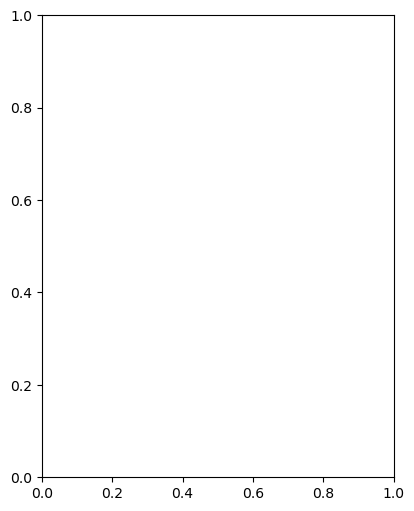

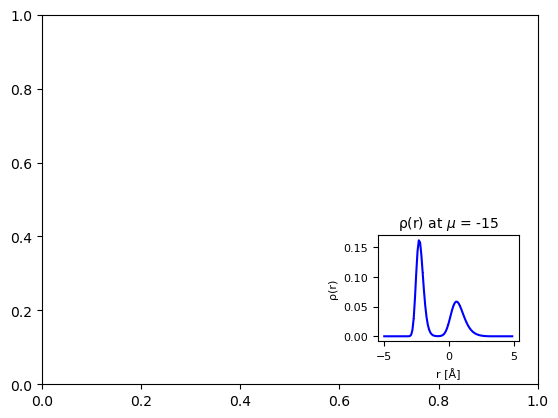

In [15]:

# Create the zoomed-in subplot
zoom_left = 0.65  # Specify the left position of the zoomed-in subplot
zoom_bottom = 0.2  # Specify the bottom position of the zoomed-in subplot, adjust this value as needed
zoom_width = 0.22  # Specify the width of the zoomed-in subplot
zoom_height = 0.22 # Specify the height of the zoomed-in subplot
ax_zoom2 = fig.add_axes([zoom_left, zoom_bottom, zoom_width, zoom_height])
ax_zoom2.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]'], linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='blue', ecolor='red')
ax_zoom2.set_title(r"ρ(r) at $\mu$ = -15", fontsize=10)  # Adjust the font size
ax_zoom2.tick_params(axis='both', which='both', labelsize=8) 
ax_zoom2.set_ylabel(r'ρ(r)',fontsize=8)
ax_zoom2.set_xlabel(r'r [Å]',fontsize=8)
plt.show()

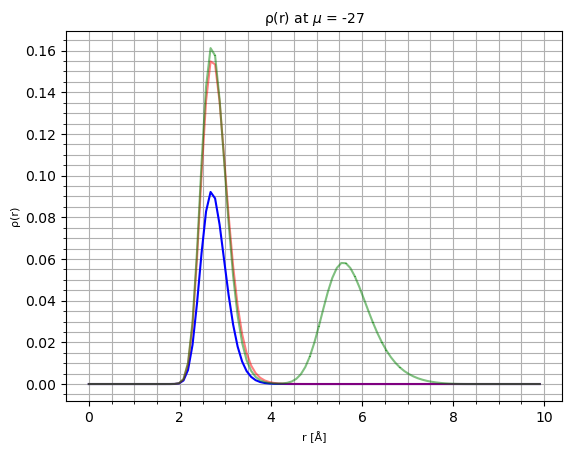

In [16]:
plt.rcParams.update(plt.rcParamsDefault)
plt.errorbar(linear_density[r'$N_g = \infty$'].data['u = -115.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -115.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -115.00 -- Δρ(r)'], color='blue')
plt.errorbar(linear_density[r'$N_g = \infty$'].data['u = -40.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -40.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -40.00 -- Δρ(r)'], color='red',alpha=.5)
plt.errorbar(linear_density[r'$N_g = \infty$'].data['u = -15.00 -- r [Å]']+5, linear_density[r'$N_g = \infty$'].data['u = -15.00 -- ρ(r)'], yerr=linear_density[r'$N_g = \infty$'].data['u = -15.00 -- Δρ(r)'], color='green',alpha=.5)
plt.minorticks_on()
plt.grid(True, which='both')
plt.xlabel(r'r [Å]',fontsize=8)
plt.ylabel(r'ρ(r)',fontsize=8)
plt.title(r"ρ(r) at $\mu$ = -27", fontsize=10)
plt.show()

In [17]:
max_index = np.argmax(np.array(linear_density[r'$N_g = 3$'].data['u = -115.00 -- ρ(r)']))
print(linear_density[r'$N_g = 3$'].data['u = -115.00 -- r [Å]'][max_index]+5)
max_index1 = np.argmax(np.array(linear_density[r'$N_g = 3$'].data['u = -40.00 -- ρ(r)']))
print(linear_density[r'$N_g = 3$'].data['u = -40.00 -- r [Å]'][max_index1]+5)

2.673267
2.673267


In [18]:
print(linear_density[r'$N_g = 2$'].data['u = -115.00 -- r [Å]'])

[-5.         -4.90099    -4.80198    -4.70297    -4.60396    -4.50495
 -4.405941   -4.306931   -4.207921   -4.108911   -4.009901   -3.910891
 -3.811881   -3.712871   -3.613861   -3.514851   -3.415842   -3.316832
 -3.217822   -3.118812   -3.019802   -2.920792   -2.821782   -2.722772
 -2.623762   -2.524752   -2.425743   -2.326733   -2.227723   -2.128713
 -2.029703   -1.930693   -1.831683   -1.732673   -1.633663   -1.534653
 -1.435644   -1.336634   -1.237624   -1.138614   -1.039604   -0.9405941
 -0.8415842  -0.7425743  -0.6435644  -0.5445545  -0.4455446  -0.3465347
 -0.2475248  -0.1485149  -0.04950495  0.04950495  0.1485149   0.2475248
  0.3465347   0.4455446   0.5445545   0.6435644   0.7425743   0.8415842
  0.9405941   1.039604    1.138614    1.237624    1.336634    1.435644
  1.534653    1.633663    1.732673    1.831683    1.930693    2.029703
  2.128713    2.227723    2.326733    2.425743    2.524752    2.623762
  2.722772    2.821782    2.920792    3.019802    3.118812    3.217822
  3